# Normal Distribution
***

_Breeda Herlihy G0041136_

This notebook will introduce the main concepts of Normal distribution and explain those concepts using the Python programming language to create plots. 

In [4]:
# Import packages 

import numpy as np
import matplotlib.pyplot as plt


### Probability
***

Probability is the likelihood of an event occurring. **[1]** In mathematical terms, it is a numerical description of how likely an event is to occur where 0 means that it is impossible and 1 means that it is certain. It can be described by this formula **[2]**:   

$$ Probability = \frac{number\, of\, desired\, outcomes}{total\, number\, of\, outcomes} $$

For example, a coin has two sides, one head and one tail. To determine the probability of a fair coin landing with it's heads up when tossed, we can calculate the probability as follows: 

In [5]:
# Probability of heads
desired = 1 # heads, one side of coin
total = 2 # coin has 2 sides

prob = desired / total
print(f"The probability of heads landing in a coin toss is {prob} or {prob*100}%")

The probability of heads landing in a coin toss is 0.5 or 50.0%


While coin tossing is a simple illustration, probability is used to help us address questions which can't be answered with absolute certainty of correctness. For example, if a clinical trial 
shows that a drug is effective among 90% of the study participants, we can use probability to ascertain if this success rate can be repeated with a different sample of patients. 

It would be impossible to test the effectiveness of drug on all patients with a particular condition so we need to be able to generalize the data generated in sample populations. We can draw a random sample from a larger target population and establish through statistics how well the sample represents the larger population with a sampling distribution. **[3]**

In most instances of statistical inference, we use the idealized mathematical descriptions of  sampling distributions. The Normal distribution is one of the most common statistical tests found in research across all disciplines.

 > _"The normal distribution is essentially a frequency distribution curve which is often formed naturally by continuous random variables."_ **[4]**

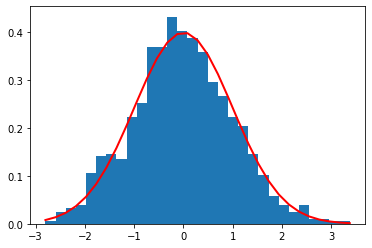

In [6]:
# Plot a normal distribution curve based on random variables

# Generate random variables using numpy.random.normal function
mu, sigma = 0, 1 # mean and standard deviation
sample = np.random.normal(mu, sigma, 1000)

# Plot a histogram
count, bins, ignored = plt.hist(sample, 30, density=True)

# Plot a curve based on the histogram 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


A continuous random variable is one which takes an infinite number of possible values. Examples of continuous random variables include IQ scores, the amount of cash a person carries, a baby's birth weight, and SAT scores used for college admissions in the US. 

Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral). [5]

The probability distribution of a continuous random variable, known as probability distribution functions, are the functions that take on continuous values.  

The normal distribution can be expressed by this equation

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$


### References
1. https://en.wikipedia.org/wiki/Probability
2. https://thirdspacelearning.com/gcse-maths/probability/how-to-calculate-probability/ 
3. Manfred Stommel P, Katherine J. Dontje PF-B. Statistics for Advanced Practice Nurses and Health Professionals. New York, NY: Springer Publishing Company; 2014. Available from: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=782334&site=eds-live&scope=site 
4. Introduction to Normal Distribution. (2021, July 29). https://stats.libretexts.org/@go/page/4575
5. https://www.datacamp.com/tutorial/probability-distributions-python 
